# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
df = pd.read_csv("car_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


##Tasks, Part 1

###1.Find the linear regression equation for mileage vs price.

In [7]:
x=df[["Mileage"]].values
y=df["Price"].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
c=model.intercept_
print(c)
m=model.coef_
print(m)

21286.771470559215
[-1450.11808638]


In [12]:
print("The linear regression equation is : y={}*x + ({})".format(m,c))

The linear regression equation is : y=[-1450.11808638]*x + (21286.771470559215)


The linear regression equation is : y=[-1450.11808638]*x + (21286.771470559215)

###2.Chart the original data and the equation on the chart.

In [13]:
y_pred=model.predict(x_test)

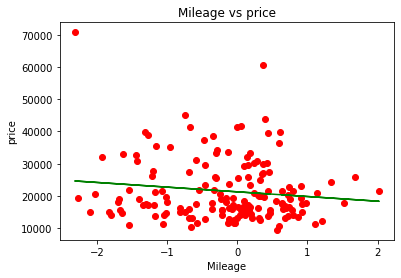

In [14]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_pred, color = "green")
plt.title("Mileage vs price")
plt.xlabel("Mileage")
plt.ylabel("price")
plt.show()

###3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [15]:
score=model.score(x_test,y_test)
print(score)
print(score*100,"%")

0.01651822401249481
1.6518224012494809 %


The model score is 0.01, which is less than 0.8, indicating the equation is not a good fit for the data

##Tasks, Part 2

###1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [16]:
x=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]].values
y=df["Price"].values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
c=round(model.intercept_,2)
print(c)
m=model.coef_

print(m)

21286.77
[-1371.0011684   5362.75715593  -636.10279397 -1161.42189697
  2605.28366558 -1046.23562996  1599.92392244]


In [21]:
print("The linear regression equation is : y={}*x1+{}*x2+{}*x3+{}*x4+{}*x5+{}*x6+{}*x7 + ({})".format(round(m[0],2),round(m[1],2),round(m[2],2),round(m[3],2),round(m[4],2),round(m[5],2),round(m[6],2),c))

The linear regression equation is : y=-1371.0*x1+5362.76*x2+-636.1*x3+-1161.42*x4+2605.28*x5+-1046.24*x6+1599.92*x7 + (21286.77)


The linear regression equation is : y=-1371.0*x1+5362.76*x2+-636.1*x3+-1161.42*x4+2605.28*x5+-1046.24*x6+1599.92*x7 + (21286.77)

###2.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
score=model.score(x_test,y_test)
print(score)
print(score*100,"%")

0.34021415975117064
34.021415975117065 %


The model score is 0.34, which is less than 0.8, indicating the equation is not a good fit for the data

###3.Find the combination of the factors that is the best predictor for price.

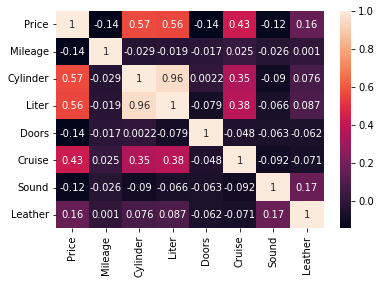

In [ ]:
import seaborn as sns
heat=sns.heatmap(df.corr(),annot=True)
heat

from correlation matrix, cylinder and liter are good features

In [27]:
x1=df[['Mileage']]
x2=df[['Cylinder']]
x3=df[['Liter']]
x4=df[['Doors']]
x5=df[['Cruise']]
x6=df[['Sound']]
x7=df[['Leather']]
y=df['Price']

In [29]:

model.fit(x1,y)
print('Mileage Score :',model.score(x1,y)*100)
model.fit(x2,y)
print('Cylinder Score :',model.score(x2,y)*100)
model.fit(x3,y)
print('Liter Score :',model.score(x3,y)*100)
model.fit(x4,y)
print('Doors Score :',model.score(x4,y)*100)
model.fit(x5,y)
print('Cruise Score :',model.score(x5,y)*100)
model.fit(x6,y)
print('Sound Score :',model.score(x6,y)*100)
model.fit(x7,y)
print('Leather Score :',model.score(x7,y)*100)

Mileage Score : 2.046344732348926
Cylinder Score : 32.385903759512246
Liter Score : 31.152674427904504
Doors Score : 1.9251466591467037
Cruise Score : 18.563300929692762
Sound Score : 1.5462387624189389
Leather Score : 2.4710851264124534


from R2 score also, cylinder and liter are best features

##Tasks, Hard Mode

###1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.


In [ ]:
df=pd.get_dummies(df,columns=["Make","Model","Type"])

In [ ]:
df.info()

###2.Find the best combination of factors to predict price.

from R2 score and correlation matrix, cylinder and liter are best combination of factors topredict price